In [91]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import skimage
import imageio
import scipy
import cv2
import numpy as np
import math as m
import pandas as pd

## 3: Read and Display

In [418]:
image_1 = imageio.imread_v2("./images/image-35.jpg")
image_1_mask = plt.imread("./images/mask-35.png")

image_dir = [ "./images/image-35.jpg", "./images/image-83.jpg", "./images/image-110.jpg" ]
mask_dir = [ "./images/mask-35.png", "./images/mask-83.png", "./images/mask-110.png" ]

names = ["image-35", "image-83", "image-110"]
images = []
masks = []

for i in range(3):
    images.append(cv2.imread(image_dir[i]))
    masks.append(cv2.imread(mask_dir[i]))

    # Convert BGR to RGB
    images[i] = images[i][:,:,[2, 1, 0]]
    masks[i] = masks[i][:,:,[2, 1, 0]]

In [419]:
fg_pixels = []
bg_pixels = []
mask_threshold = 0.8

for i in range(3):
    fg_image = images[i][(masks[i] >= mask_threshold).all(axis=2)]
    fg_pixels.append(fg_image)

    bg_image = images[i][(masks[i] < mask_threshold).all(axis=2)]
    bg_pixels.append(bg_image)

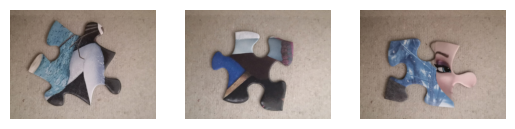

In [420]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

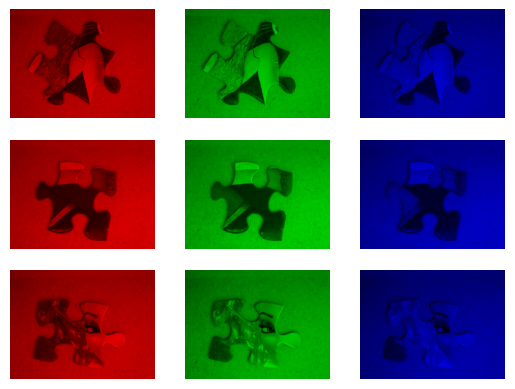

In [421]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(3, 3, i * 3 + 1)
    channel = np.zeros_like(images[i])
    channel[:,:,0] = images[i][:,:,0]
    plt.imshow(channel)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 2)
    channel = np.zeros_like(images[i])
    channel[:,:,1] = images[i][:,:,1]
    plt.imshow(channel)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 3)
    channel = np.zeros_like(images[i])
    channel[:,:,2] = images[i][:,:,2]
    plt.imshow(channel)
    plt.axis('off')

plt.show()

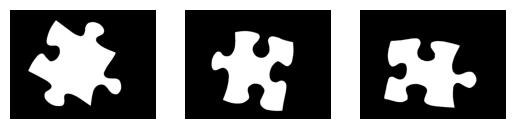

In [422]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(masks[i])
    plt.axis('off')

plt.show()

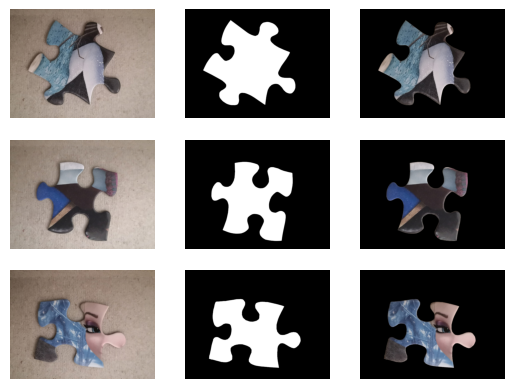

In [423]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i], cmap=plt.cm.Reds_r)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 2)
    plt.imshow(masks[i], cmap=plt.cm.Greens_r)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 3)
    plt.imshow(((images[i] / 255).astype(np.float32) * masks[i] / 255).astype(np.float32), cmap=plt.cm.Blues_r)
    plt.axis('off')

plt.show()

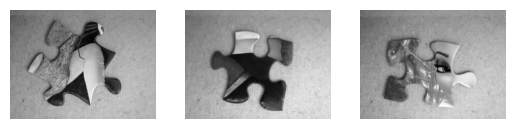

In [424]:
grayscale_images = []
for i in range(3):
    grayscale_images.append(skimage.color.rgb2gray(images[i]))

fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(grayscale_images[i], cmap="gray")
    plt.axis('off')

plt.show()

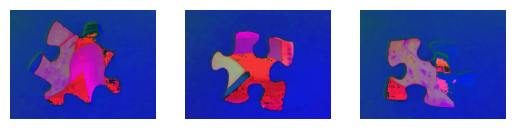

In [425]:
hsv_images = []
for i in range(3):
    hsv_images.append(skimage.color.rgb2hsv(images[i]))

fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(hsv_images[i])
    plt.axis('off')

plt.show()

## 4: Descriptive Statistics

In [426]:
num_pixels = []
for i, im in enumerate(images):
    num_pixels.append(im.shape[0] * im.shape[1])
    print(f"{names[i]} dimensions (w,h) = ({im.shape[1]}, {im.shape[0]})")

image-35 dimensions (w,h) = (600, 450)
image-83 dimensions (w,h) = (600, 450)
image-110 dimensions (w,h) = (600, 450)


In [427]:
num_fg_pixels = []
for i, mk in enumerate(masks):
    num_fg_pixels.append(len(mk[(mk >= 0.5).all(axis=2)]))
    print(f"{names[i]} mask white pixel count = {num_fg_pixels[i]}")

image-35 mask white pixel count = 75145
image-83 mask white pixel count = 60937
image-110 mask white pixel count = 61365


In [428]:
for i in range(3):
    max_value = np.max(grayscale_images[i][:,:])
    print(f"{names[i]} max grayscale pixel value = {m.floor(max_value * 255)}")


image-35 max grayscale pixel value = 229
image-83 max grayscale pixel value = 228
image-110 max grayscale pixel value = 216


In [429]:
for i in range(3):
    max_puzzle_value = np.max(grayscale_images[i] * masks[i][:,:,0])
    print(f"{names[i]} max grayscale puzzle pixel value = {m.floor(max_puzzle_value * 255)}")

image-35 max grayscale puzzle pixel value = 58427
image-83 max grayscale puzzle pixel value = 58340
image-110 max grayscale puzzle pixel value = 55280


In [430]:
for i in range(3):
    mean_intensity = np.mean(grayscale_images[i])
    print(f"{names[i]} mean grayscale pixel intensity = {m.floor(mean_intensity * 255)}")

image-35 mean grayscale pixel intensity = 137
image-83 mean grayscale pixel intensity = 144
image-110 mean grayscale pixel intensity = 136


In [431]:
for i in range(3):
    mean_puzzle_brightness = np.mean(fg_pixels[i])
    print(f"{names[i]} mean grayscale puzzle pixel intensity = {mean_puzzle_brightness}")

image-35 mean grayscale puzzle pixel intensity = 114.24362676603012
image-83 mean grayscale puzzle pixel intensity = 86.32908851217924
image-110 mean grayscale puzzle pixel intensity = 121.680376979277


In [432]:
for i in range(3):
    mean_bg_brightness = np.mean(bg_pixels[i])
    print(f"{names[i]} mean grayscale background pixel intensity = {mean_bg_brightness}")

image-35 mean grayscale background pixel intensity = 145.5426877355408
image-83 mean grayscale background pixel intensity = 161.20881106014295
image-110 mean grayscale background pixel intensity = 141.29735183454358


In [433]:
for i in range(3):
    var_pixels = np.var(images[i])
    print(f"{names[i]} variance of grayscale pixel intensity = {var_pixels}")

image-35 variance of grayscale pixel intensity = 1404.3826391412886
image-83 variance of grayscale pixel intensity = 2065.040802728243
image-110 variance of grayscale pixel intensity = 1116.6102551699073


In [434]:
for i in range(3):
    var_fg_pixels = np.var(fg_pixels[i])
    print(f"{names[i]} variance of grayscale puzzle pixel intensity = {var_fg_pixels}")

image-35 variance of grayscale puzzle pixel intensity = 2632.4021537505537
image-83 variance of grayscale puzzle pixel intensity = 2097.024734321342
image-110 variance of grayscale puzzle pixel intensity = 2084.248513331908


In [435]:
for i in range(3):
    var_bg_pixels = np.var(bg_pixels[i])
    print(f"{names[i]} variance of grayscale background pixel intensity = {var_bg_pixels}")

image-35 variance of grayscale background pixel intensity = 658.1527006539823
image-83 variance of grayscale background pixel intensity = 790.2659920188643
image-110 variance of grayscale background pixel intensity = 744.5402523716309


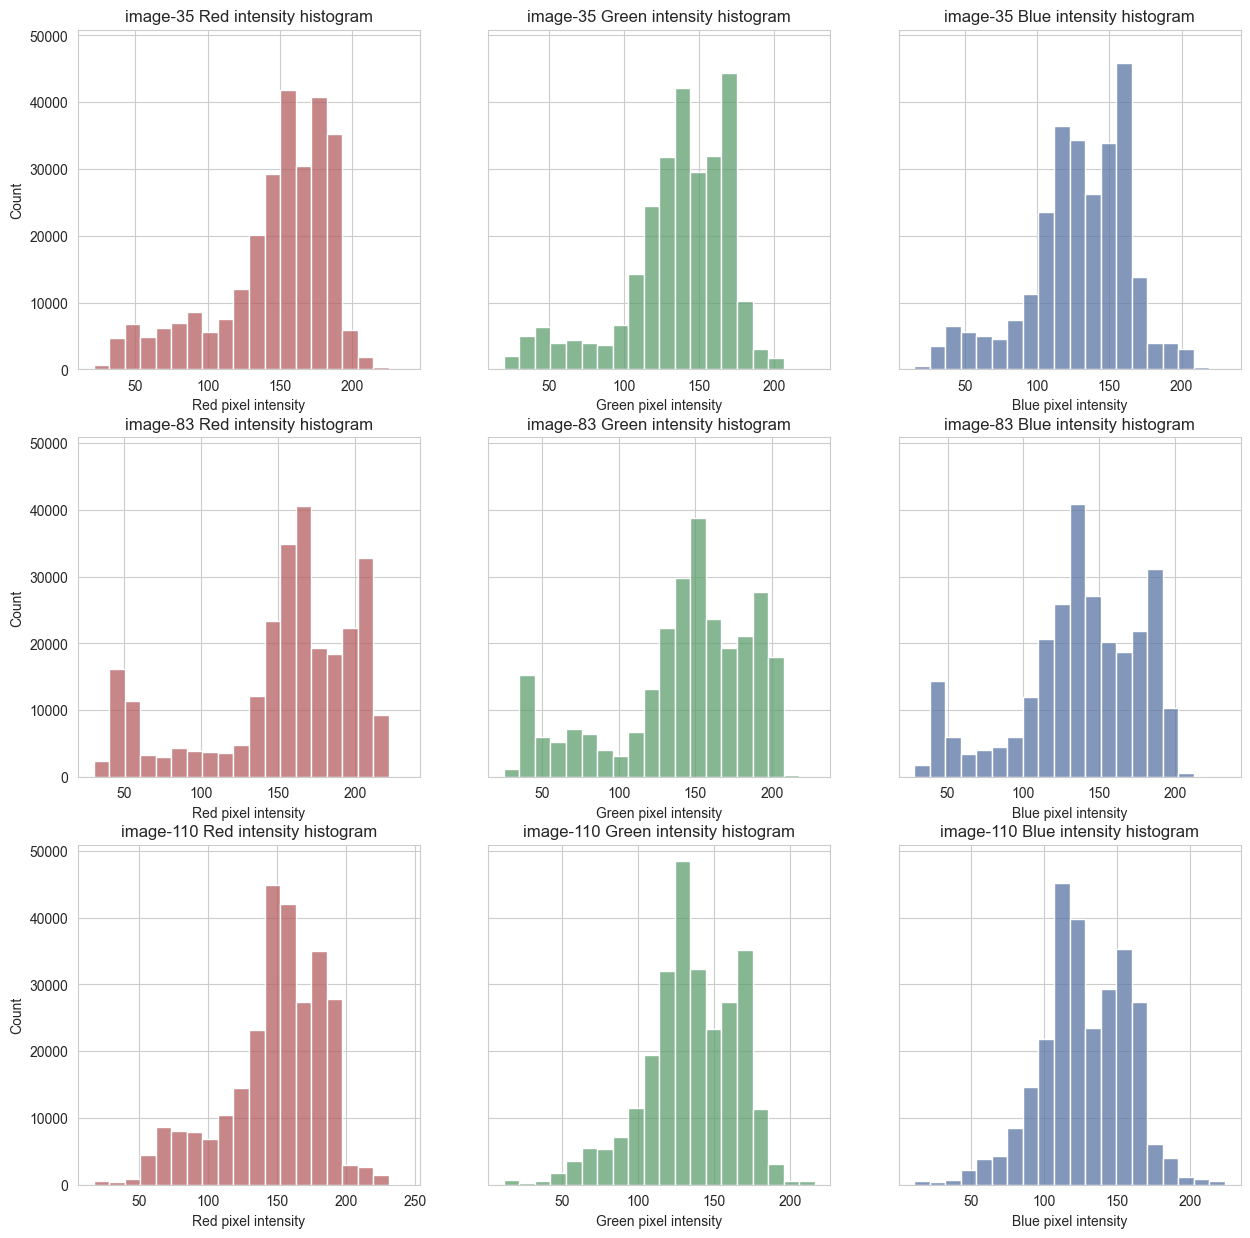

In [436]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=images[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c]
        )
plt.show()

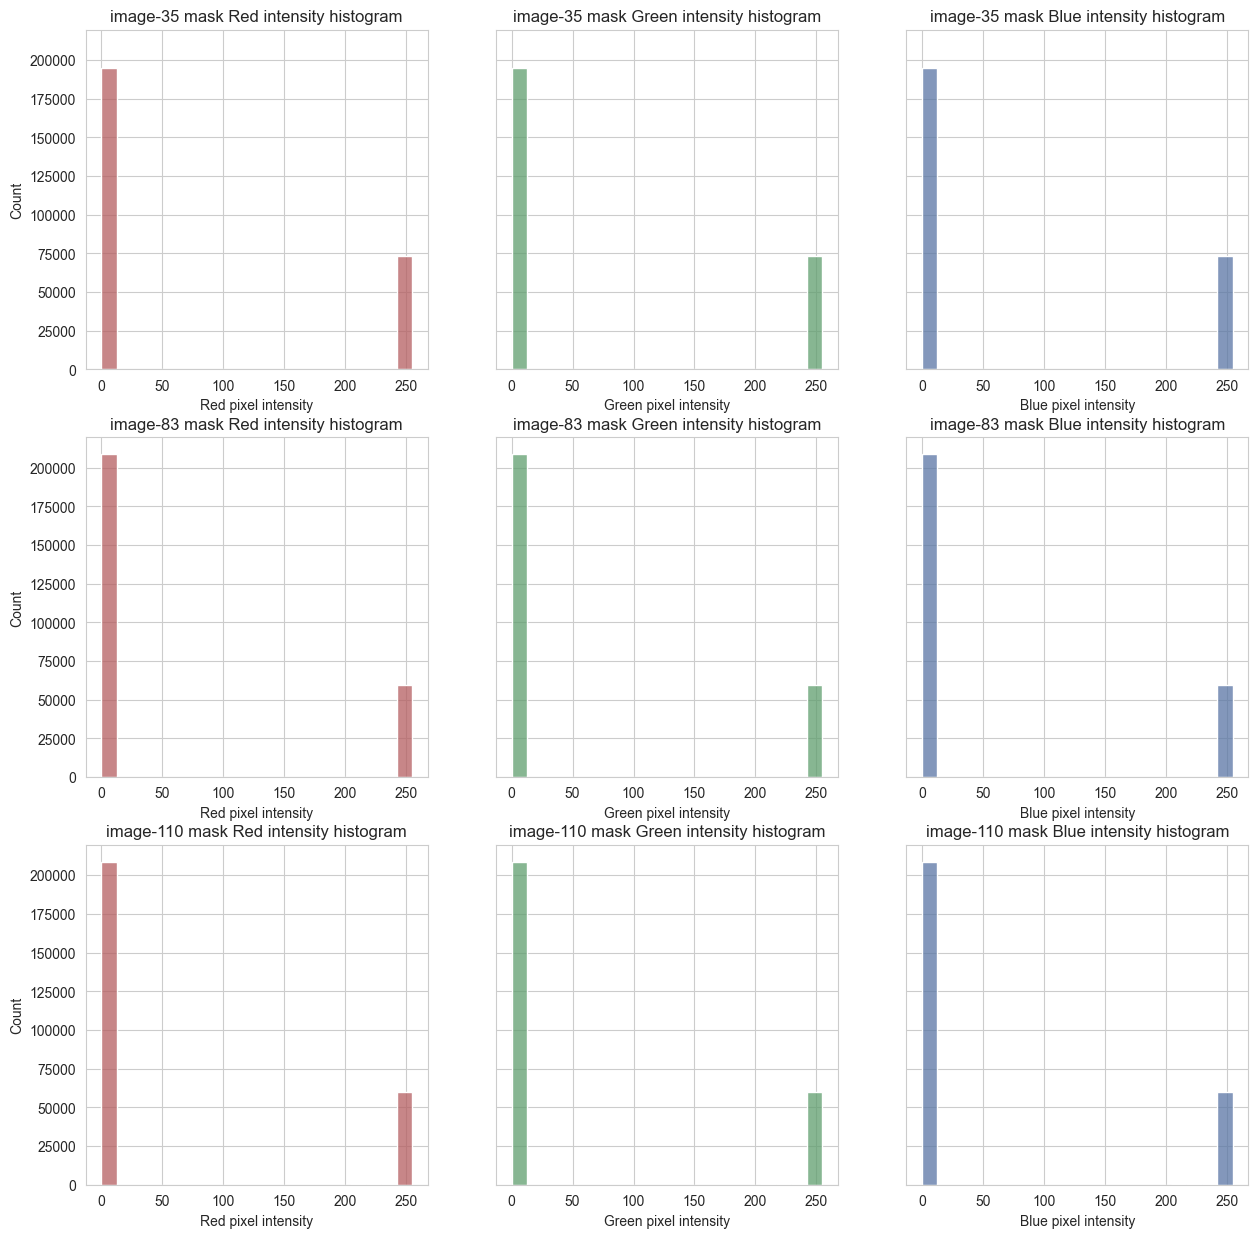

In [437]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} mask {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=masks[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c]
        )
plt.show()

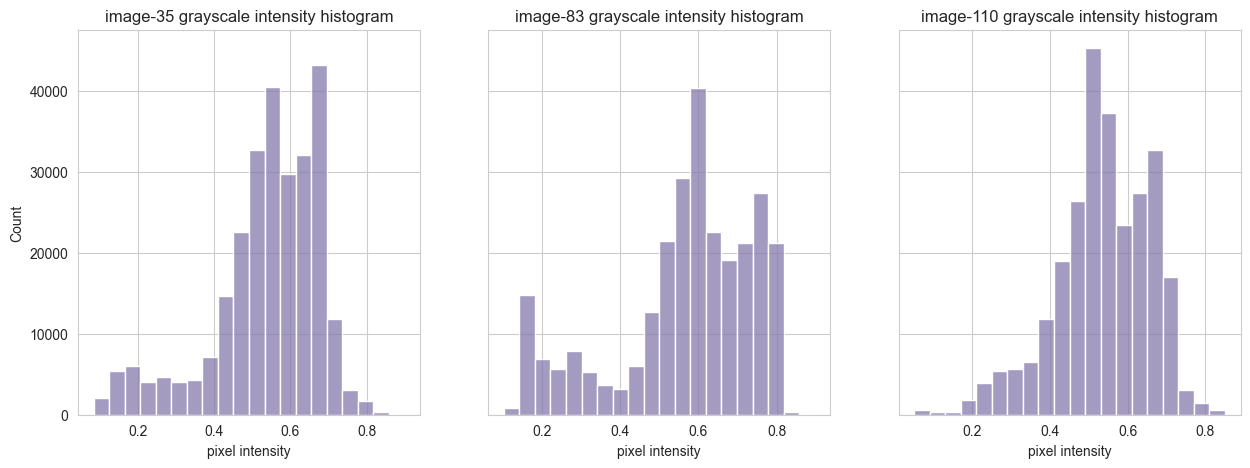

In [438]:
fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(15,5))
sns.set_style("whitegrid")

for i in range(3):
    ax[i].set_title(f"{names[i]} grayscale intensity histogram")
    ax[i].set_xlabel(f"pixel intensity")
    sns.histplot(
        stat='count',
        bins='sturges',
        data=grayscale_images[i][:,:].flatten(),
        ax=ax[i],
        color="#857aab"
    )
plt.show()

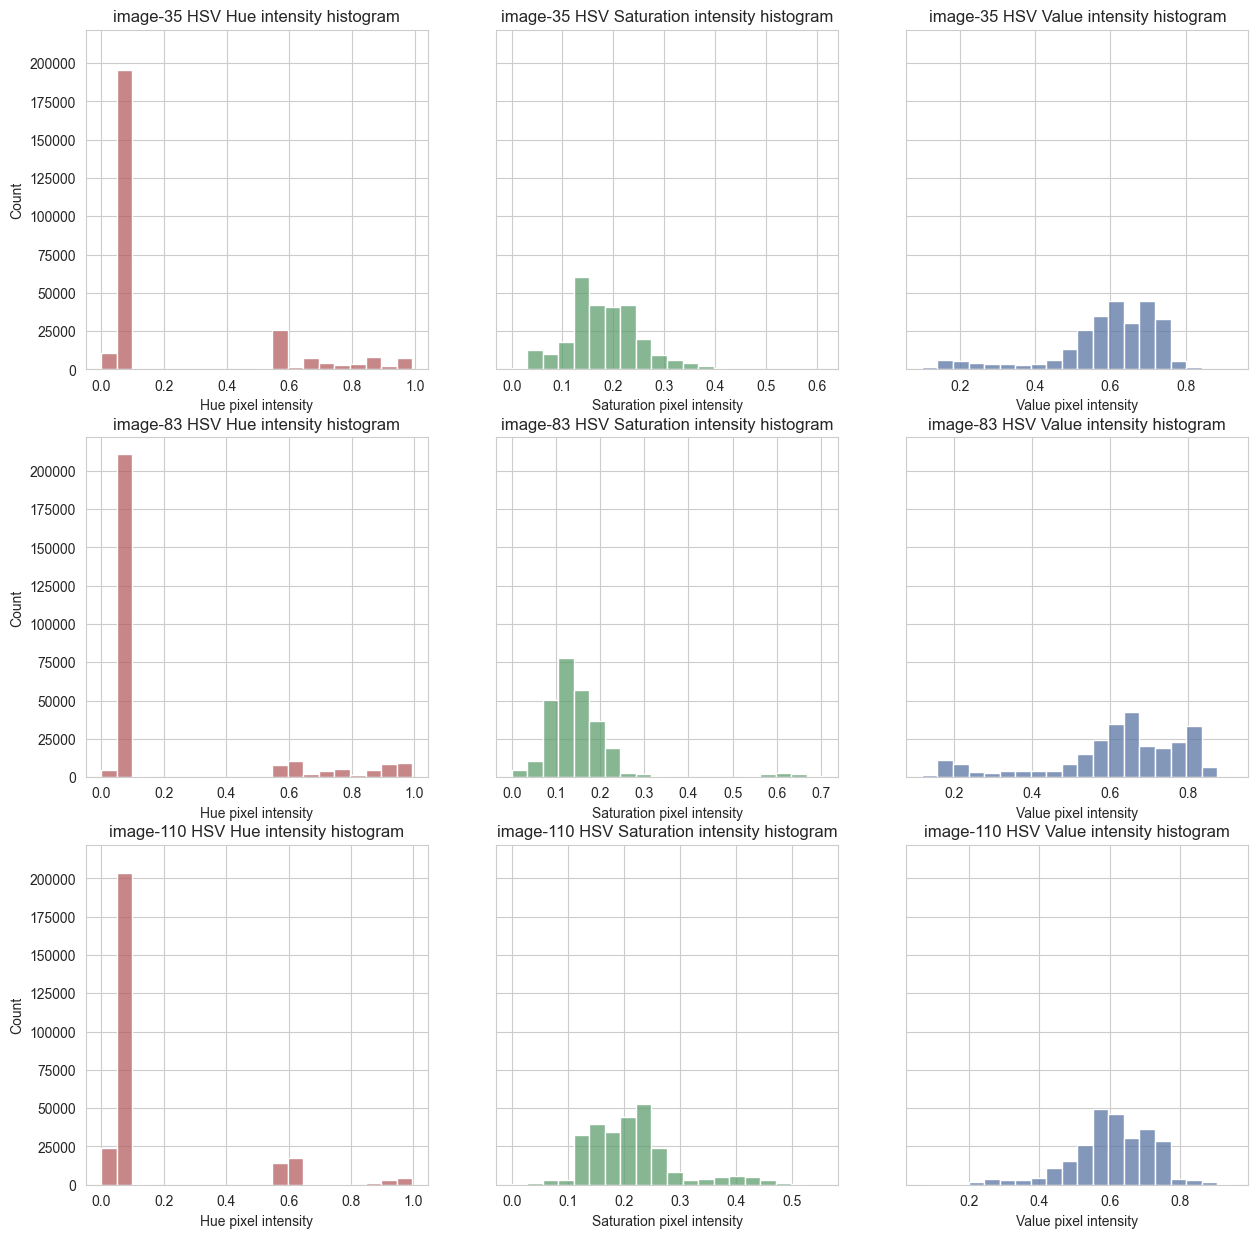

In [439]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Hue", "Saturation", "Value"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} HSV {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=hsv_images[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c]
        )
plt.show()

### KDE Histograms

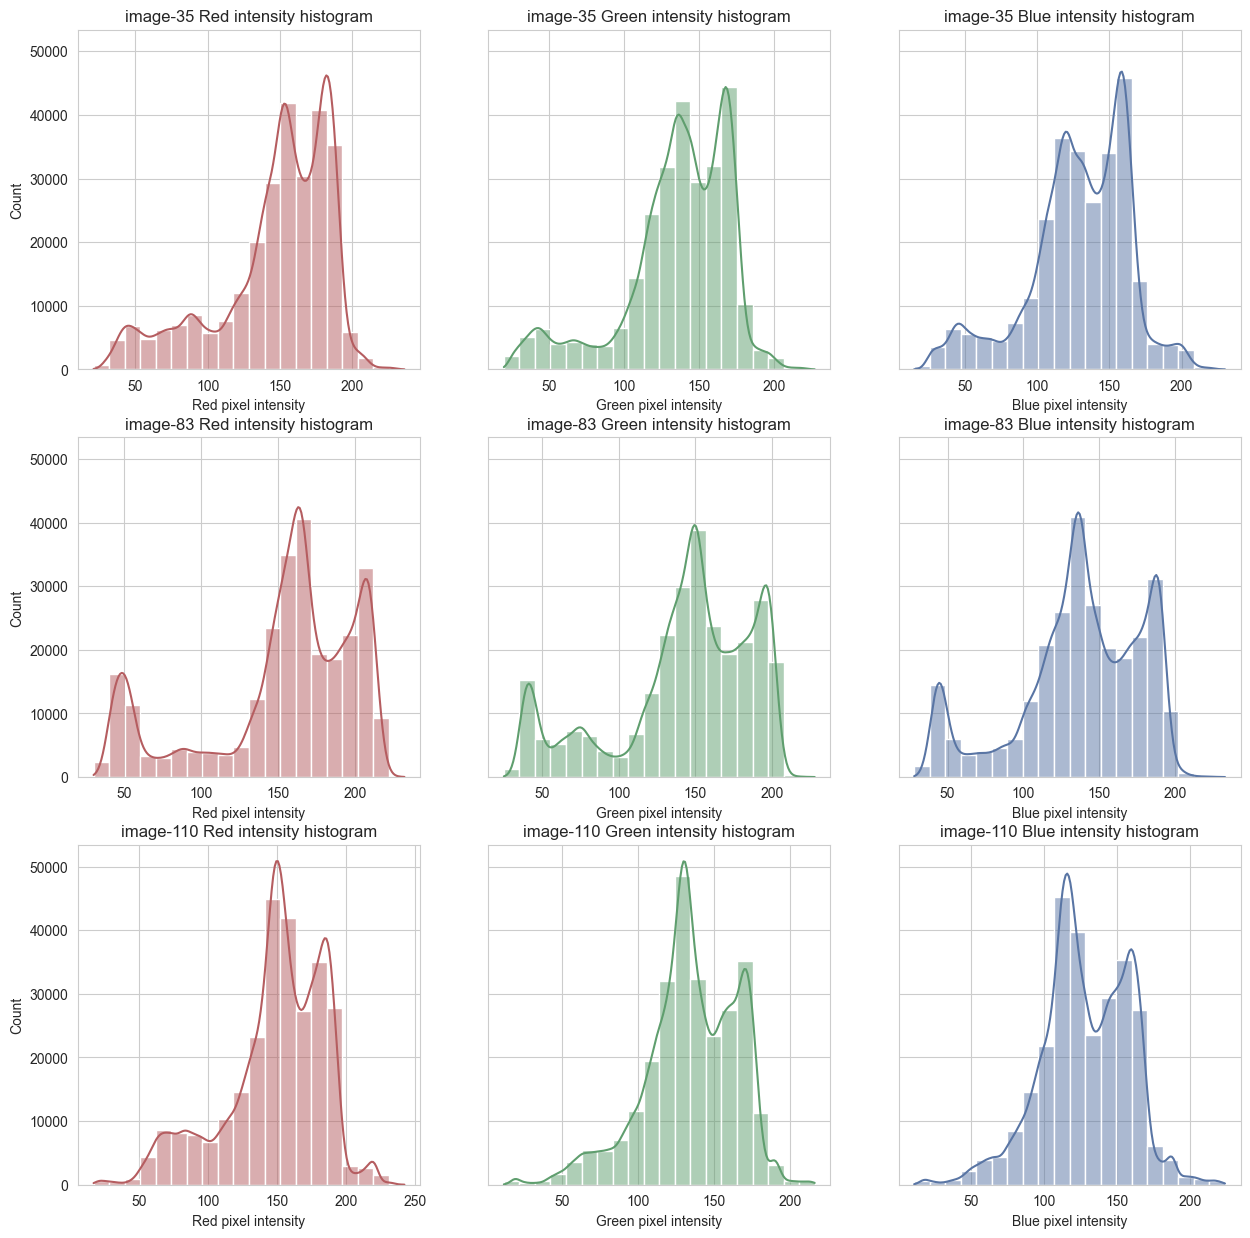

In [440]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=images[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c],
            kde=True
        )
plt.show()

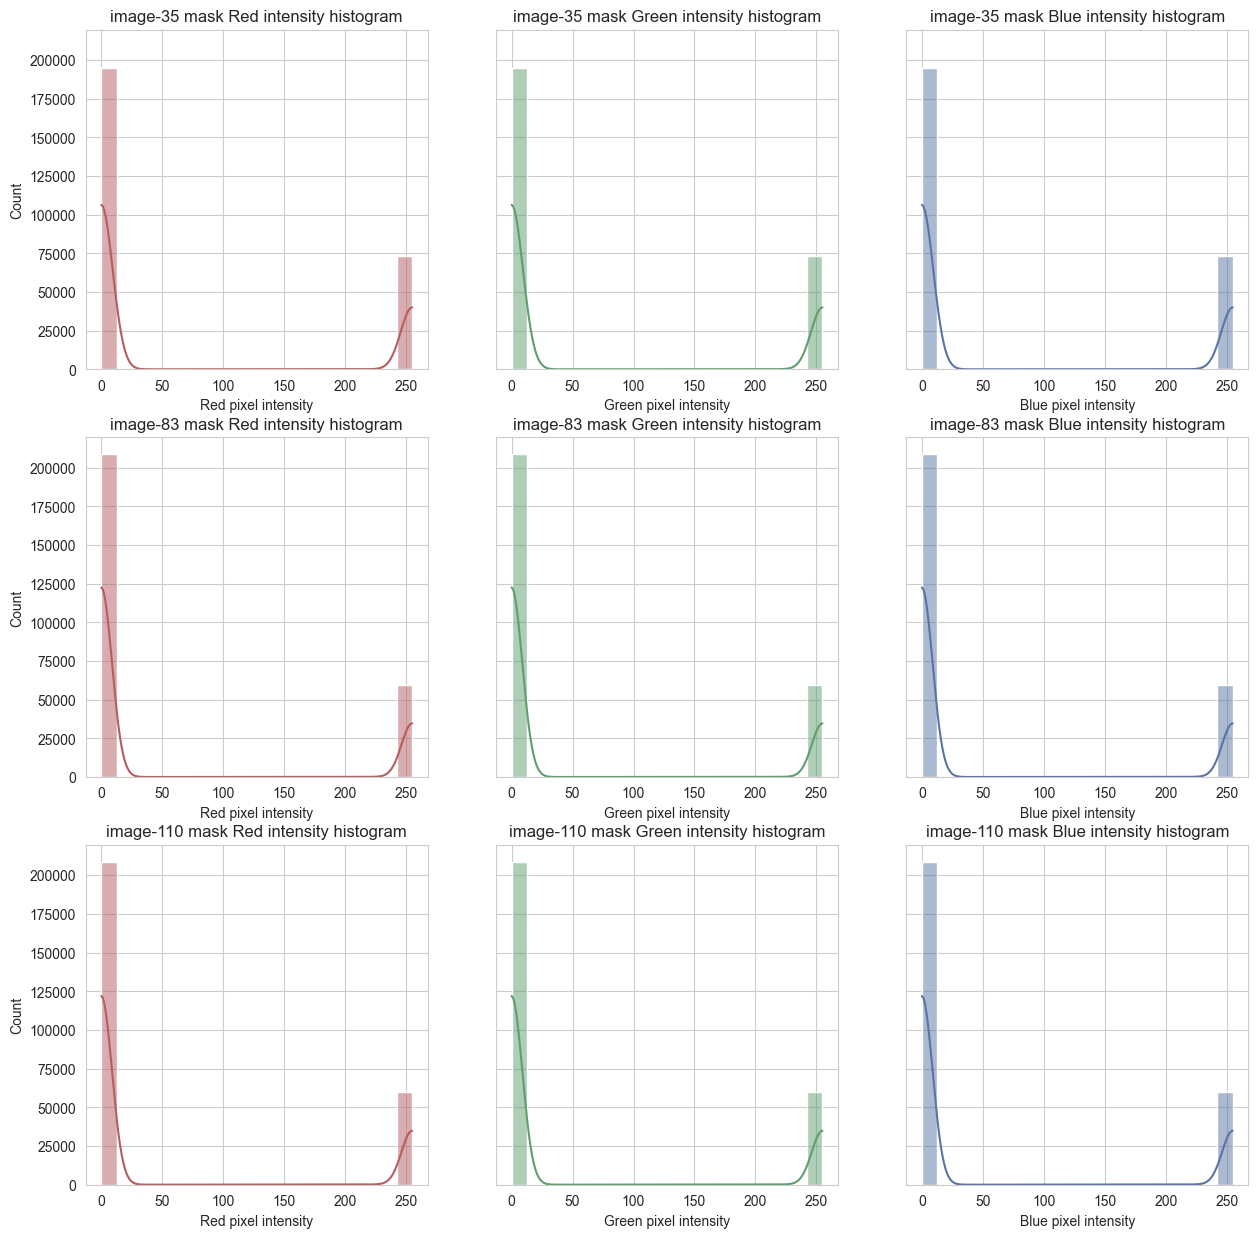

In [441]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Red", "Green", "Blue"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} mask {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=masks[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c],
            kde=True
        )
plt.show()

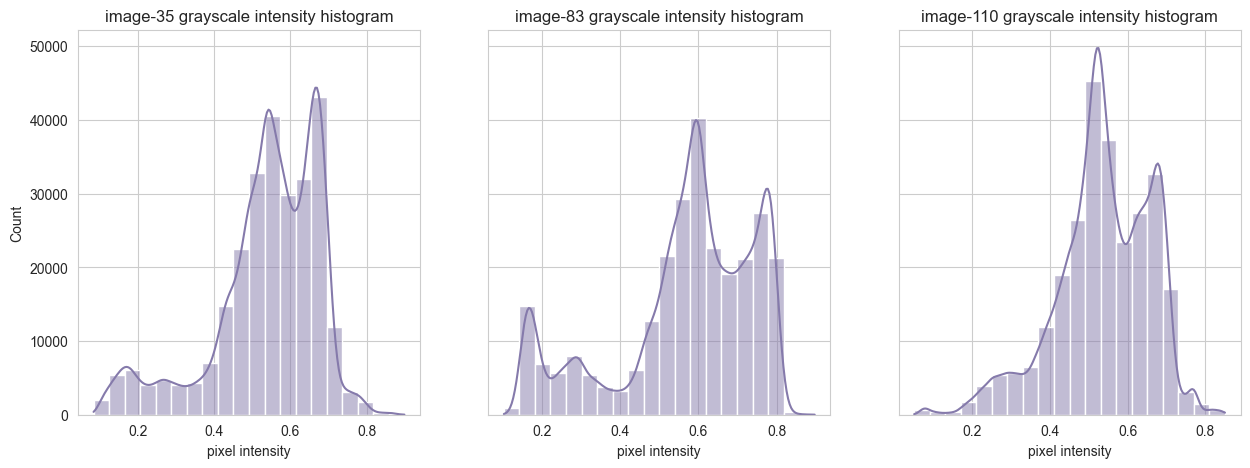

In [442]:
fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(15,5))
sns.set_style("whitegrid")

for i in range(3):
    ax[i].set_title(f"{names[i]} grayscale intensity histogram")
    ax[i].set_xlabel(f"pixel intensity")
    sns.histplot(
        stat='count',
        bins='sturges',
        data=grayscale_images[i][:,:].flatten(),
        ax=ax[i],
        color="#857aab",
        kde=True
    )
plt.show()

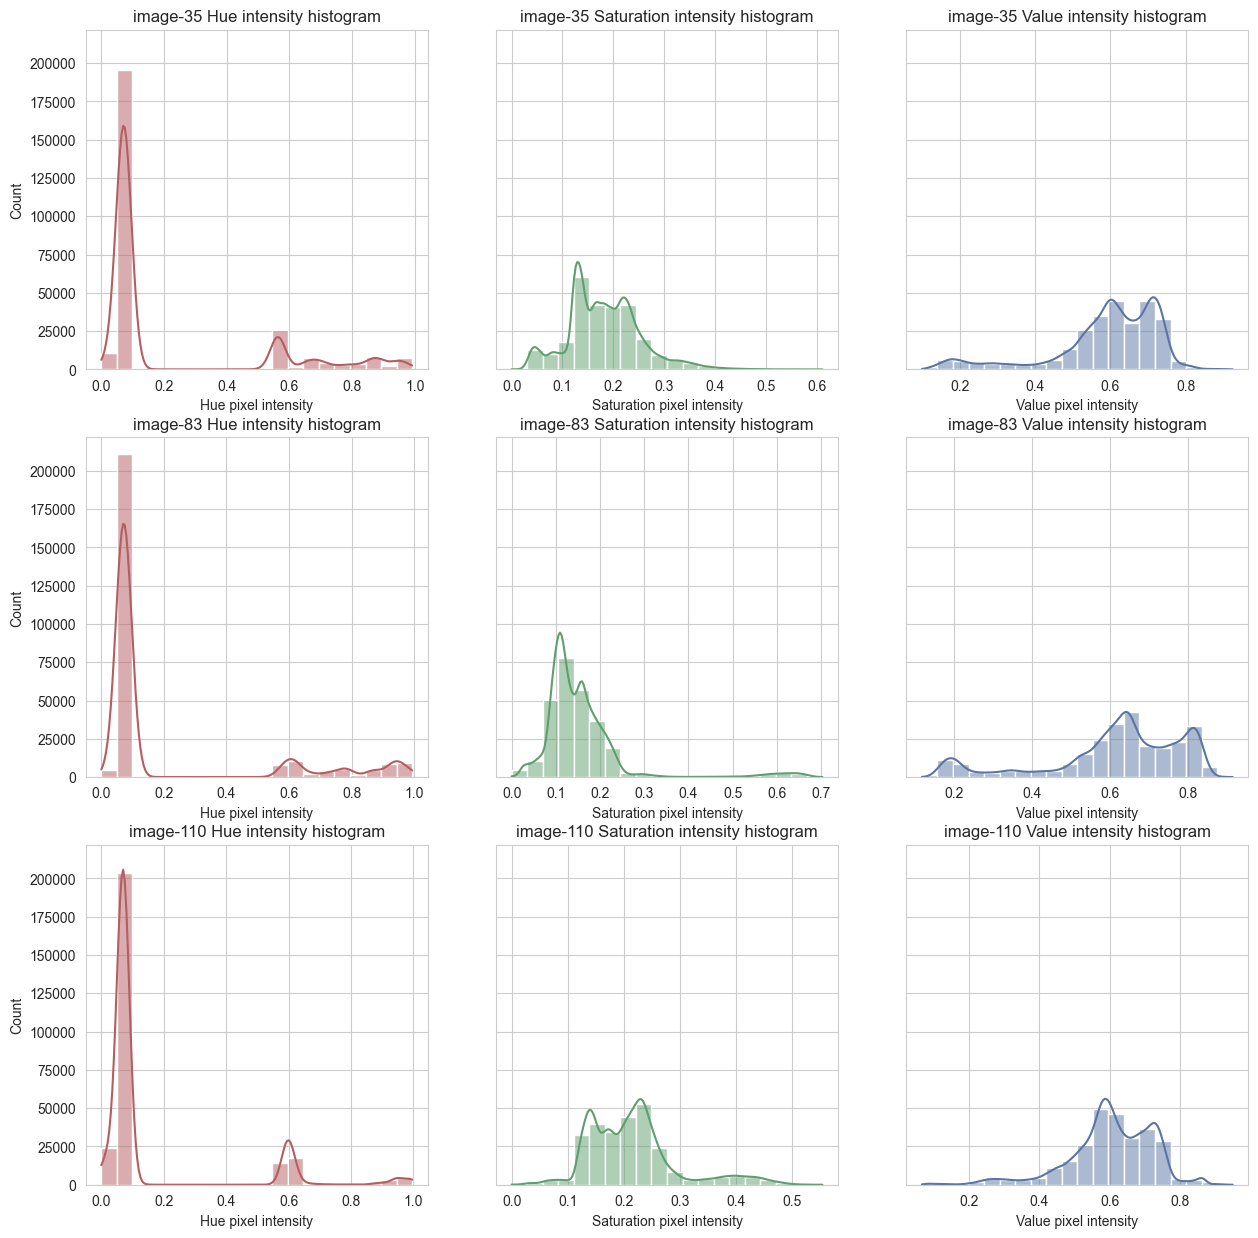

In [443]:
fig, ax = plt.subplots(ncols = 3, nrows=3, sharey=True, figsize=(15,15))
sns.set_style("whitegrid")

channel = ["Hue", "Saturation", "Value"]
channel_colours = ["#b55d60", "#5f9e6e", "#5975a4"]

for c in range(3):
    for i in range(3):
        ax[i,c].set_title(f"{names[i]} {channel[c]} intensity histogram")
        ax[i,c].set_xlabel(f"{channel[c]} pixel intensity")
        sns.histplot(
            stat='count',
            bins='sturges',
            data=hsv_images[i][:,:,c].flatten(),
            ax=ax[i,c],
            color=channel_colours[c],
            kde=True
        )
plt.show()

## 5: Background Classifier

In [100]:
# Convert image to float
for i in range(3):
    images[i] = skimage.img_as_float(images[i])

In [102]:
def apply_filter(image, kernel, zero_padding=False, rotate_kernel=False):
    pad_width = m.floor(kernel.shape[0] / 2)
    pad_height = m.floor(kernel.shape[1] / 2)

    if zero_padding:
        mode = 'constant'
    else:
        mode = 'edge'

    result = np.zeros(image.shape)
    image = np.pad(image, pad_width=((pad_height, pad_height), (pad_width, pad_width)), mode=mode)
    if rotate_kernel:
        kernel = np.flip(kernel, (0,1))

    start_row = pad_height
    end_row = image.shape[0] - pad_height - 1

    start_col = pad_width 
    end_col = image.shape[1] - pad_width - 1

    for i in range(start_row, end_row + 1):
        for j in range(start_col, end_col + 1):
            result[i - start_row,j - start_col] = np.sum(image[i - pad_height:i + pad_height + 1,j - pad_width: j + pad_width + 1] * kernel)

    return result


In [103]:
prewitt_h = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
prewitt_v = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1960784313725488..1.0980392156862746].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.494117647058823..1.6392156862745098].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6392156862745101..1.113725490196078].


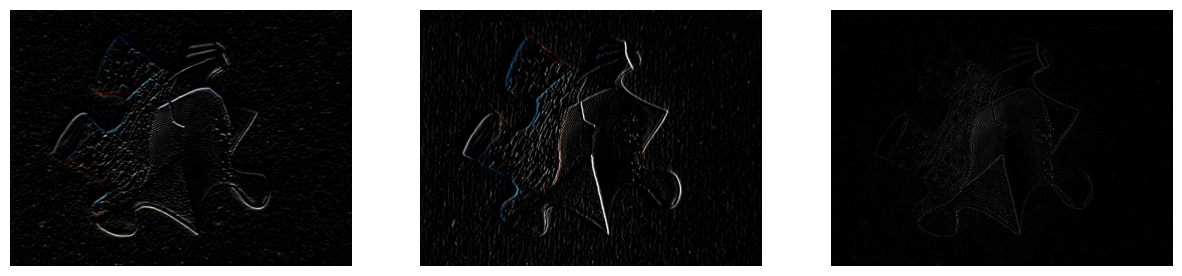

In [104]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

myconv_prewitt_h_image = np.zeros(images[0].shape)
myconv_prewitt_v_image = np.zeros(images[0].shape)
myconv_laplacian_image = np.zeros(images[0].shape)
for c in range(3):
    myconv_prewitt_h_image[:,:,c] = apply_filter(images[0][:,:,c], prewitt_h, rotate_kernel=True)
    myconv_prewitt_v_image[:,:,c] = apply_filter(images[0][:,:,c], prewitt_v, rotate_kernel=True)
    myconv_laplacian_image[:,:,c] = apply_filter(images[0][:,:,c], laplacian, rotate_kernel=True)

for i in range(3):
    ax[i].axis('off')
ax[0].imshow(myconv_prewitt_h_image)
ax[1].imshow(myconv_prewitt_v_image)
ax[2].imshow(myconv_laplacian_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0980392156862746..1.1960784313725488].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6392156862745098..1.494117647058823].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6392156862745101..1.113725490196078].


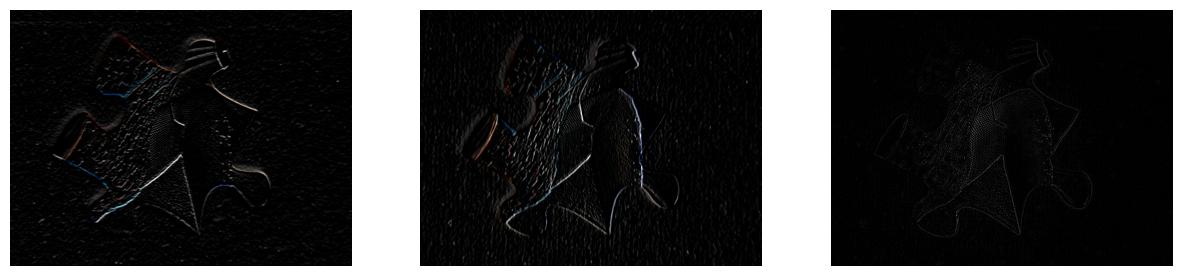

In [105]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

mycross_prewitt_h_image = np.zeros(images[0].shape)
mycross_prewitt_v_image = np.zeros(images[0].shape)
mycross_laplacian_image = np.zeros(images[0].shape)
for c in range(3):
    mycross_prewitt_h_image[:,:,c] = apply_filter(images[0][:,:,c], prewitt_h, rotate_kernel=False)
    mycross_prewitt_v_image[:,:,c] = apply_filter(images[0][:,:,c], prewitt_v, rotate_kernel=False)
    mycross_laplacian_image[:,:,c] = apply_filter(images[0][:,:,c], laplacian, rotate_kernel=False)

for i in range(3):
    ax[i].axis('off')
ax[0].imshow(mycross_prewitt_h_image)
ax[1].imshow(mycross_prewitt_v_image)
ax[2].imshow(mycross_laplacian_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0980392156862746..1.1960784313725488].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6392156862745098..1.4941176470588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.63921568627451..1.1137254901960785].


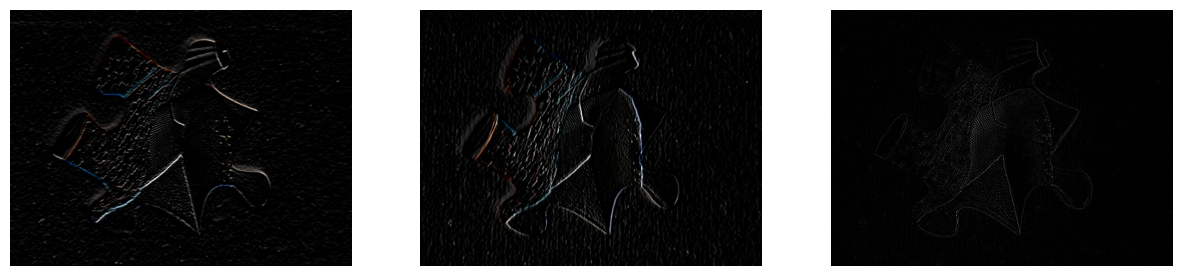

In [106]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

cv2_prewitt_h_image = np.zeros(images[0].shape)
cv2_prewitt_v_image = np.zeros(images[0].shape)
cv2_laplacian_image = np.zeros(images[0].shape)
for c in range(3):
    cv2_prewitt_h_image[:,:,c] = cv2.filter2D(src=images[0][:,:,c], kernel=prewitt_h, ddepth=-1)
    cv2_prewitt_v_image[:,:,c] = cv2.filter2D(src=images[0][:,:,c], kernel=prewitt_v, ddepth=-1)
    cv2_laplacian_image[:,:,c] = cv2.filter2D(src=images[0][:,:,c], kernel=laplacian, ddepth=-1)

for i in range(3):
    ax[i].axis('off')
ax[0].imshow(cv2_prewitt_h_image)
ax[1].imshow(cv2_prewitt_v_image)
ax[2].imshow(cv2_laplacian_image)

In [108]:
prewitt_h_images = []
prewitt_v_images = []
laplacian_images = []

for i in range(3):
    h_image = np.zeros(images[i].shape)
    v_image = np.zeros(images[i].shape)
    l_image = np.zeros(images[i].shape)

    h_image[:,:,0] = cv2.filter2D(src=images[i][:,:,0], kernel=prewitt_h, ddepth=-1)
    h_image[:,:,1] = cv2.filter2D(src=images[i][:,:,1], kernel=prewitt_h, ddepth=-1)
    h_image[:,:,2] = cv2.filter2D(src=images[i][:,:,2], kernel=prewitt_h, ddepth=-1)

    v_image[:,:,0] = cv2.filter2D(src=images[i][:,:,0], kernel=prewitt_v, ddepth=-1)
    v_image[:,:,1] = cv2.filter2D(src=images[i][:,:,1], kernel=prewitt_v, ddepth=-1)
    v_image[:,:,2] = cv2.filter2D(src=images[i][:,:,2], kernel=prewitt_v, ddepth=-1)

    l_image[:,:,0] = cv2.filter2D(src=images[i][:,:,0], kernel=laplacian, ddepth=-1)
    l_image[:,:,1] = cv2.filter2D(src=images[i][:,:,1], kernel=laplacian, ddepth=-1)
    l_image[:,:,2] = cv2.filter2D(src=images[i][:,:,2], kernel=laplacian, ddepth=-1)

    prewitt_h_images.append(h_image)
    prewitt_v_images.append(v_image)
    laplacian_images.append(l_image)



In [109]:
data = []
for i in range(3):
    image_features = np.zeros((*images[i].shape[:2], 15))

    image_features[:,:,0] = prewitt_v_images[i][:,:,0]
    image_features[:,:,1] = prewitt_h_images[i][:,:,0]
    image_features[:,:,2] = prewitt_v_images[i][:,:,1]
    image_features[:,:,3] = prewitt_h_images[i][:,:,1]
    image_features[:,:,4] = prewitt_v_images[i][:,:,2]
    image_features[:,:,5] = prewitt_h_images[i][:,:,2]

    image_features[:,:,6] = laplacian_images[i][:,:,0]
    image_features[:,:,7] = laplacian_images[i][:,:,1]
    image_features[:,:,8] = laplacian_images[i][:,:,2]

    image_features[:,:,9] = images[i][:,:,0]
    image_features[:,:,10] = images[i][:,:,1]
    image_features[:,:,11] = images[i][:,:,2]

    image_features[:,:,12] = hsv_images[i][:,:,0]
    image_features[:,:,13] = hsv_images[i][:,:,1]
    image_features[:,:,14] = hsv_images[i][:,:,2]

    data.append(image_features)

In [110]:
training_mean = np.mean(data[0], axis=(0,1))
training_fg_mean = np.mean(data[0][(masks[i] >= mask_threshold).all(axis=2)], axis=0)
training_bg_mean = np.mean(data[0][(masks[i] < mask_threshold).all(axis=2)], axis=0)

training_covariance = np.cov(data[0].reshape(-1,15).transpose())
training_fg_covariance = np.cov(data[0][(masks[i] >= mask_threshold).all(axis=2)].transpose())
training_bg_covariance = np.cov(data[0][(masks[i] < mask_threshold).all(axis=2)].transpose())

In [172]:
all_pixels_pdf = scipy.stats.multivariate_normal(mean=training_mean, cov=training_covariance, allow_singular=True)
fg_pixels_pdf = scipy.stats.multivariate_normal(mean=training_fg_mean, cov=training_bg_covariance, allow_singular=True)
bg_pixels_pdf = scipy.stats.multivariate_normal(mean=training_bg_mean, cov=training_bg_covariance, allow_singular=True)

def fg_probabilites(feature_vector):
    # return fg_pixels_pdf.pdf(feature_vector) * num_fg_pixels[0] / ( num_fg_pixels[0] * fg_pixels_pdf.pdf(feature_vector) + (num_pixels[0] - num_fg_pixels[0]) * bg_pixels_pdf.pdf(feature_vector) )
    numerator = fg_pixels_pdf.pdf(feature_vector) * num_fg_pixels[0]
    denominator_fg = fg_pixels_pdf.pdf(feature_vector) * num_fg_pixels[0]
    denominator_bg = bg_pixels_pdf.pdf(feature_vector) * (num_pixels[0] - num_fg_pixels[0])
    denominator = denominator_fg + denominator_bg

    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

def fg_classifier(prob_values, fg_threshold):
    return (prob_values > fg_threshold).astype(np.float32)

(np.float64(0.0), np.float64(600.0), np.float64(450.0), np.float64(0.0))

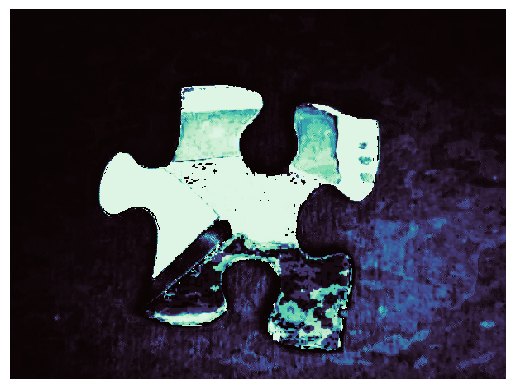

In [173]:
predicted_images = []
classified_images = []
test_thresholds = np.arange(0., 1., 0.2)
image_probabilities = fg_probabilites(data[1])
predicted_images.append(image_probabilities)

for i in range(len(test_thresholds)):
    image_classes = fg_classifier(image_probabilities, test_thresholds[i])
    classified_images.append(image_classes)

ax = sns.heatmap(image_probabilities, cmap="mako", cbar=False)
ax.axis('off')

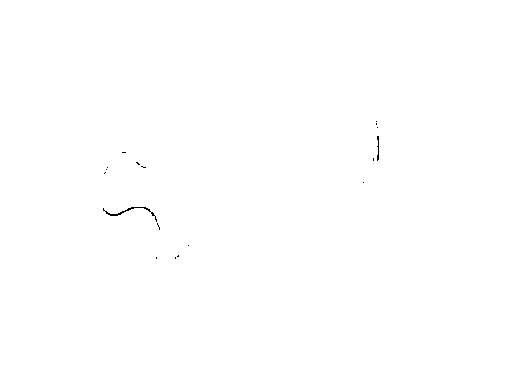

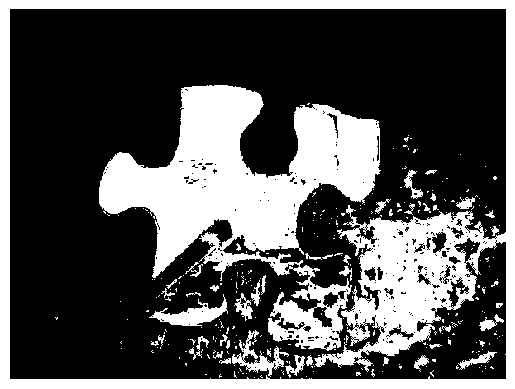

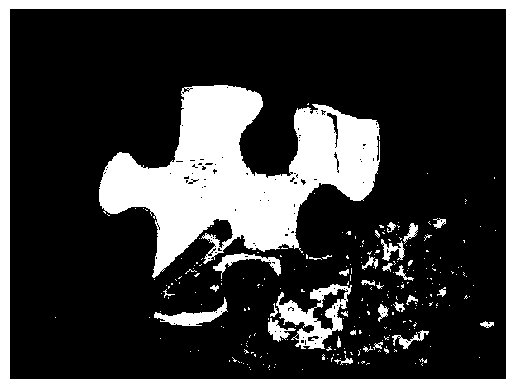

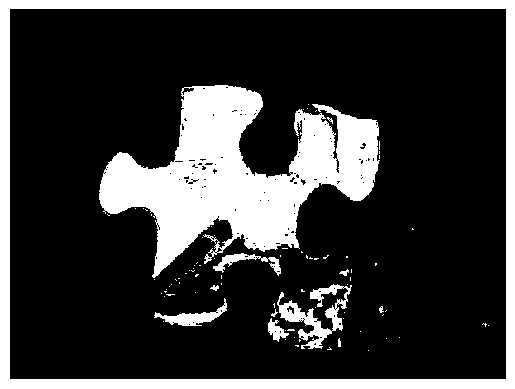

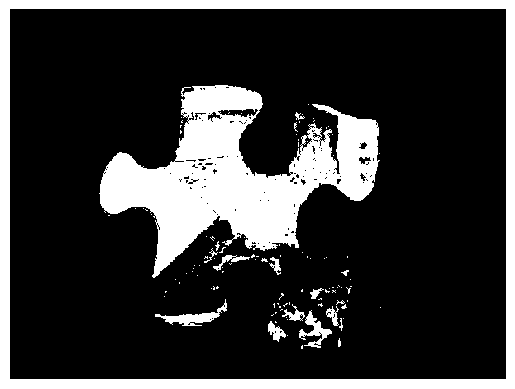

In [174]:
for i in range(len(test_thresholds)):
    ax = sns.heatmap(classified_images[i], cmap="grey", cbar=False)
    ax.axis('off')
    plt.show()

In [167]:
num_true_positives = []
num_true_negatives = []
num_false_positives = []
num_false_negatives = []
num_predictions = []

accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

true_positive_rate = []
false_positive_rate = []

for i in range(len(test_thresholds)):
    is_fg = (masks[1] >= mask_threshold).all(axis=2)
    is_classified_fg = classified_images[i] == 1.

    is_bg = np.logical_not(is_fg)
    is_classified_bg = np.logical_not(is_classified_fg)

    num_true_positives.append(len(classified_images[i][is_fg & is_classified_fg]))
    num_true_negatives.append(len(classified_images[i][is_bg & is_classified_bg]))
    num_false_positives.append(len(classified_images[i][is_bg & is_classified_fg]))
    num_false_negatives.append(len(classified_images[i][is_fg & is_classified_bg]))
    num_predictions.append(classified_images[i].shape[0] * classified_images[i].shape[1])

    accuracies.append( (num_true_positives[-1] + num_true_negatives[-1]) / num_predictions[-1] )
    precisions.append( num_true_positives[-1] / (num_true_positives[-1] + num_false_positives[-1]) )
    recalls.append( num_true_positives[-1] / (num_true_positives[-1] + num_false_negatives[-1]) )
    f1_scores.append( 2 * precisions[-1] * recalls[-1] / (precisions[-1] + recalls[-1]) )

    true_positive_rate.append( num_true_positives[-1] / (num_true_positives[-1] + num_false_negatives[-1]) )
    false_positive_rate.append( num_false_positives[-1] / (num_false_positives[-1] + num_true_negatives[-1]) )

accuracies = np.array(accuracies)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)

true_positive_rate = np.array(true_positive_rate)
false_positive_rate = np.array(false_positive_rate)

In [168]:
results = pd.DataFrame(data={
    'Classification Threshold': test_thresholds,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1_scores,
    'TPR': true_positive_rate,
    'FPR': false_positive_rate
})

<Axes: xlabel='FPR', ylabel='TPR'>

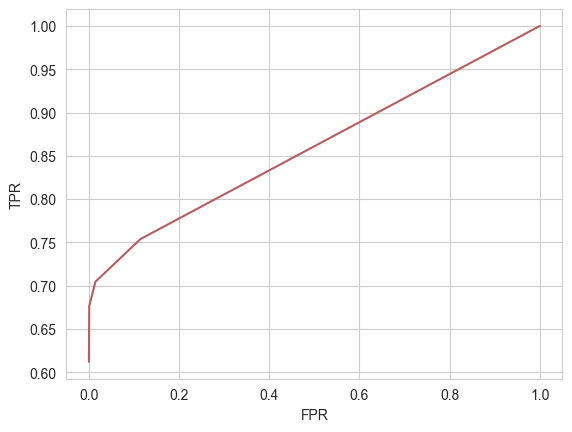

In [169]:
sns.lineplot(data=results, x="FPR", y="TPR", c="#b55d60")

In [170]:
results = pd.melt(results, ['Classification Threshold'], var_name='Metrics', value_name='score')

<Axes: xlabel='Classification Threshold', ylabel='score'>

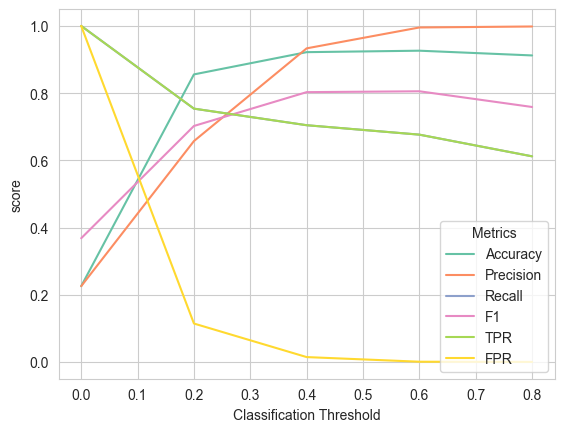

In [171]:
sns.lineplot(data=results, x="Classification Threshold", y="score", hue="Metrics", palette="Set2")